#Ejercicio 5: Plot statistics seaborn

##Importar archivo

In [1]:
def import_csv(file):
    import pandas as pd
    return pd.read_csv(file)

In [2]:
path = "../Datos/Terminos_lagoon_TA_DIC_2023_RawData.csv"

data_frame = import_csv(path)

In [3]:
print(data_frame.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample                   106 non-null    object 
 1   date                     106 non-null    object 
 2   estuary                  106 non-null    object 
 3   area                     106 non-null    object 
 4   station                  106 non-null    object 
 5   layer_depth              106 non-null    object 
 6   season                   106 non-null    object 
 7   chlorophy_microg_l       106 non-null    float64
 8   cond_microsiemens_cm     106 non-null    float64
 9   depth_m                  106 non-null    float64
 10  do_percent_sat           106 non-null    float64
 11  do_mg_l                  106 non-null    float64
 12  sal_psu                  106 non-null    float64
 13  sp_cond_microsiemens_cm  106 non-null    float64
 14  turbidity_fnu            1

##Cargar bibliotecas y establecer figuras

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt 

#create your own color array (viridis)
my_colors = ["#5ec962", "#3b528b"]

# add color array to set_palette
sns.set(font_scale=2, style="ticks", palette= my_colors)

##Boxplot con bigotes en seaborn

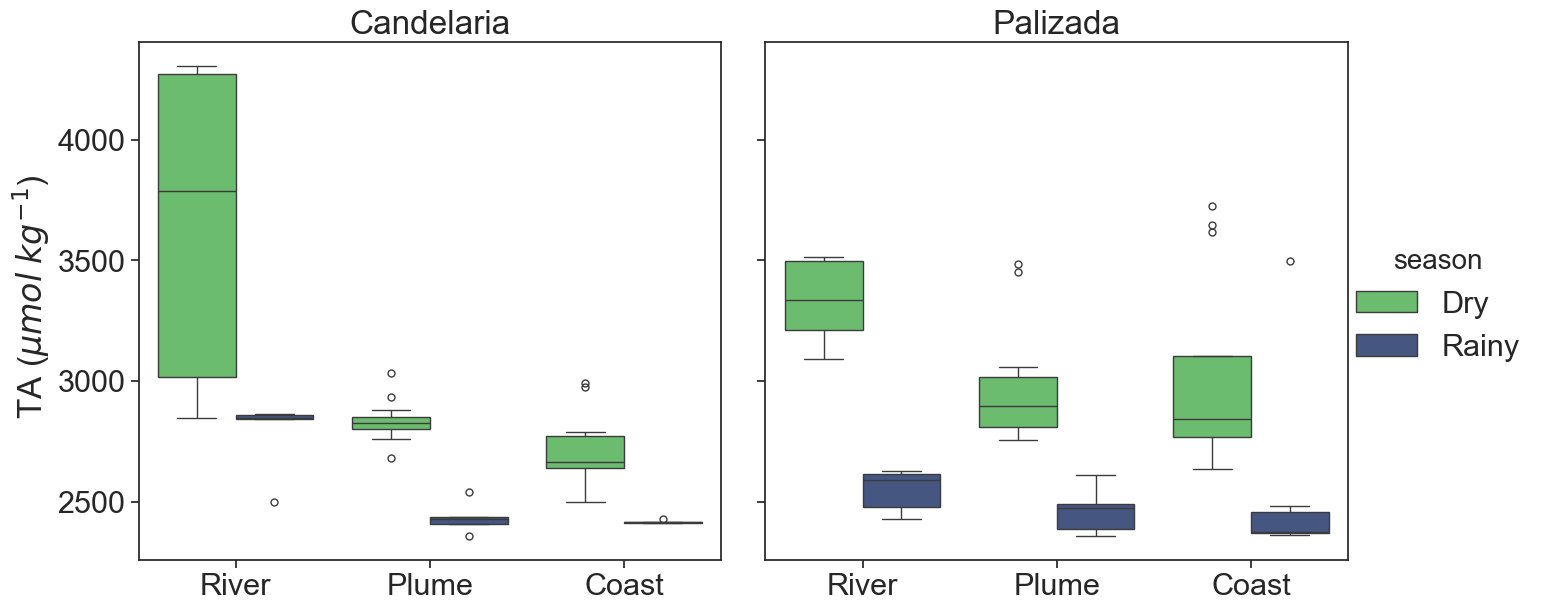

In [5]:
ax = sns.catplot(data=data_frame,
                 x="area", y="ta_micromol_kg",
                hue="season", col="estuary",
                kind="box", 
                height=7, aspect=1)

  
ax.set(xlabel='', ylabel=' TA ($\mu mol \; kg^{-1}$)')

ax.set_titles(col_template="{col_name}", row_template="{row_name}")

plt.setp(ax._legend.get_title(), fontsize=20)

sns.despine(top=False,right=False)

plt.show()

##Violin con bigotes en seaborn

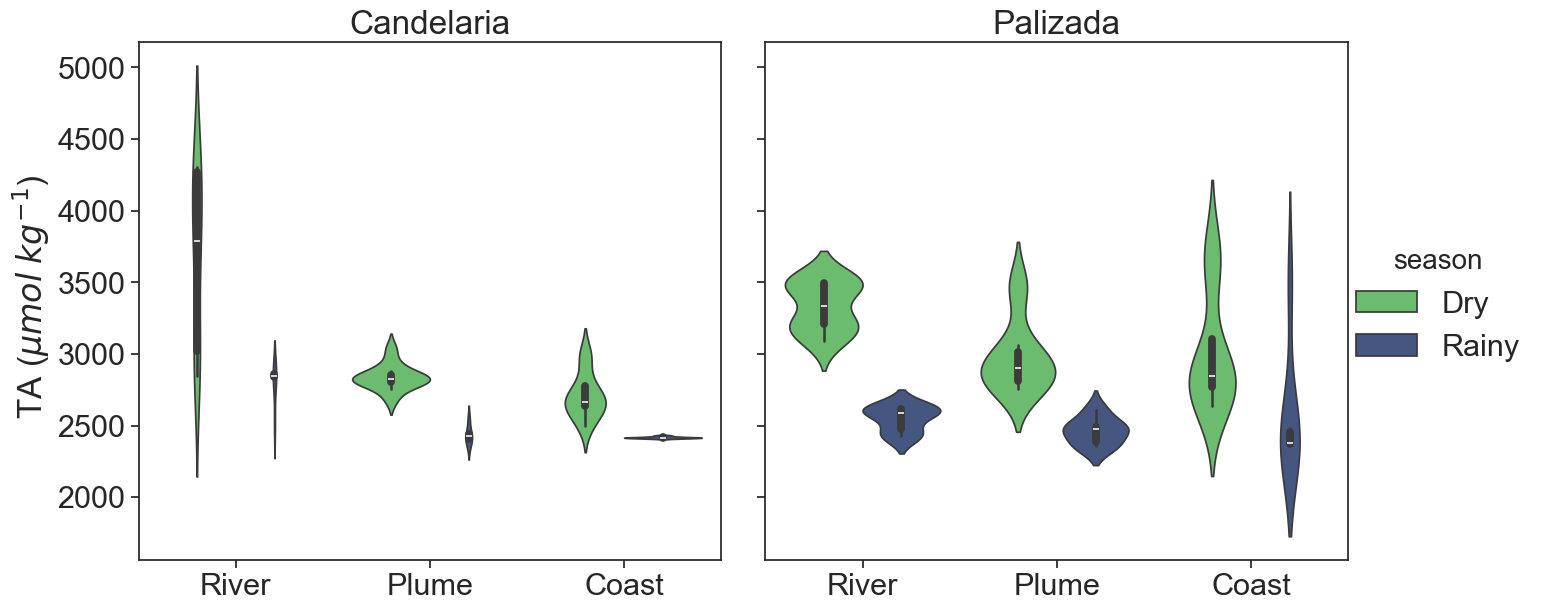

In [6]:
ax = sns.catplot(data=data_frame, 
                x="area", y="ta_micromol_kg",
                hue="season", col="estuary", 
                kind="violin", 
                height=7, aspect=1)

  
ax.set(xlabel='', ylabel=' TA ($\mu mol \; kg^{-1}$)')

ax.set_titles(col_template="{col_name}", row_template="{row_name}")

plt.setp(ax._legend.get_title(), fontsize=20)

sns.despine(top=False,right=False)

plt.show()

##Anova de 3 vías

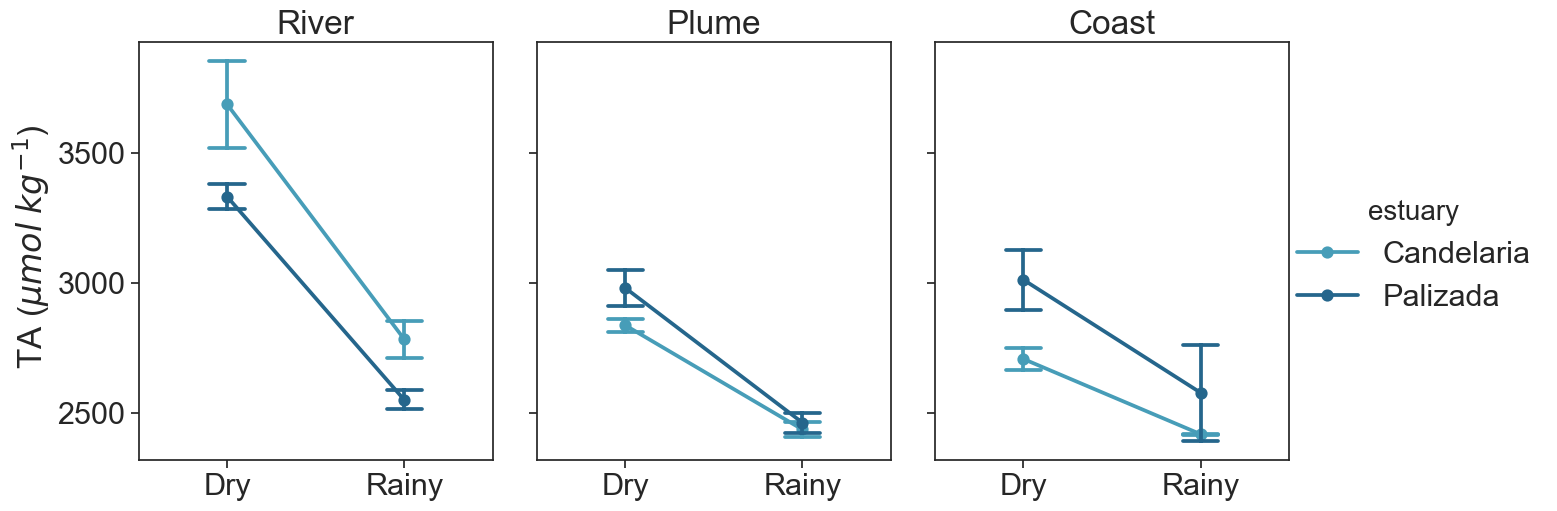

In [7]:
ax = sns.catplot(
    data=data_frame, x="season", 
    y="ta_micromol_kg", hue="estuary", col="area",
    capsize=.2, palette="YlGnBu_d", errorbar="se",
    kind="point", height=6, aspect=.75,
)
ax.despine(left=True)

ax.set(xlabel='', ylabel=' TA ($\mu mol \; kg^{-1}$)')

ax.set_titles(col_template="{col_name}", row_template="{row_name}")

plt.setp(ax._legend.get_title(), fontsize=20)

sns.despine(top=False,right=False)

plt.show()

##Diagrama de dispersión DIC vs Salinidad por estaurio

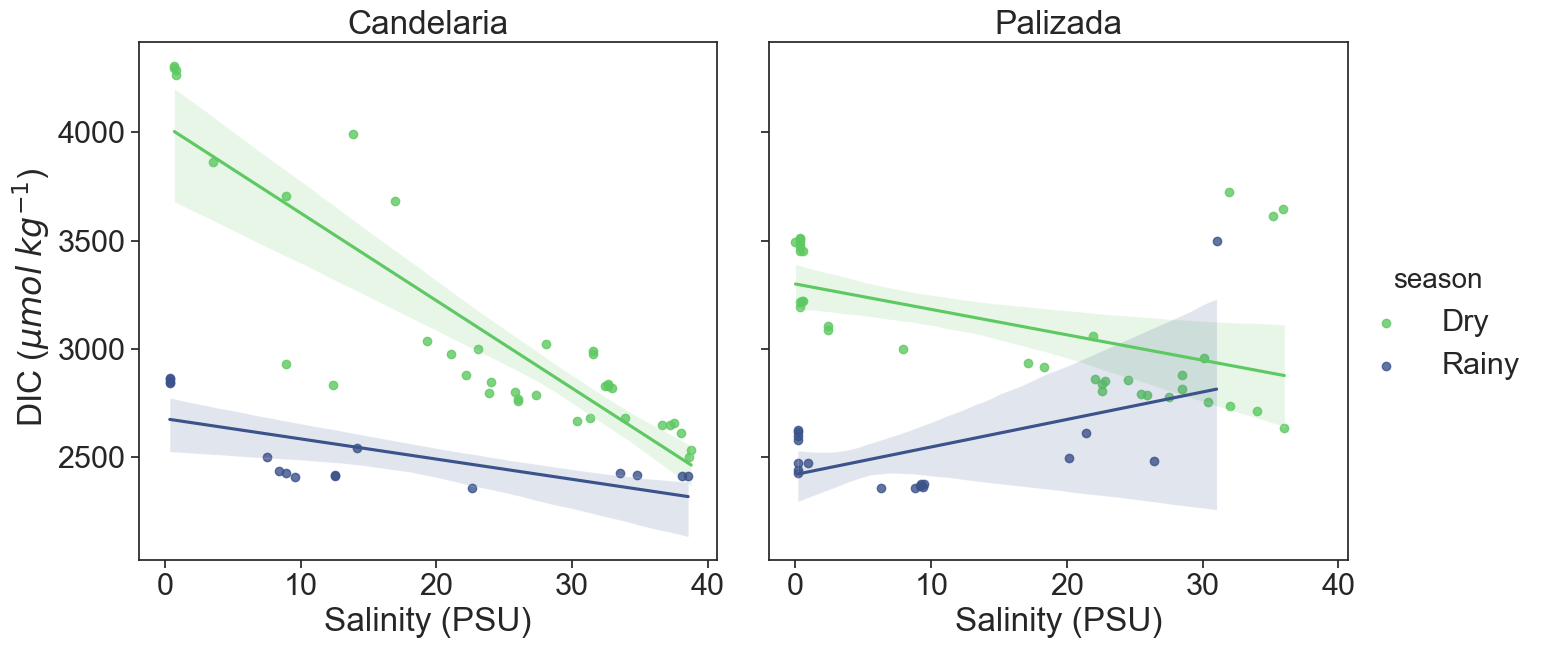

In [8]:
ax = sns.lmplot(x="sal_psu", y="ta_micromol_kg",
                hue="season",col="estuary",
                data=data_frame, 
                height=7, aspect=1)

ax.set(xlabel='Salinity (PSU)', ylabel=' DIC ($\mu mol \; kg^{-1}$)')

ax.set_titles(col_template="{col_name}", row_template="{row_name}")

plt.setp(ax._legend.get_title(), fontsize=20)

sns.despine(top=False,right=False)

plt.show()

In [9]:
##Ejericio 1. Cambiar unidades de las figuras 

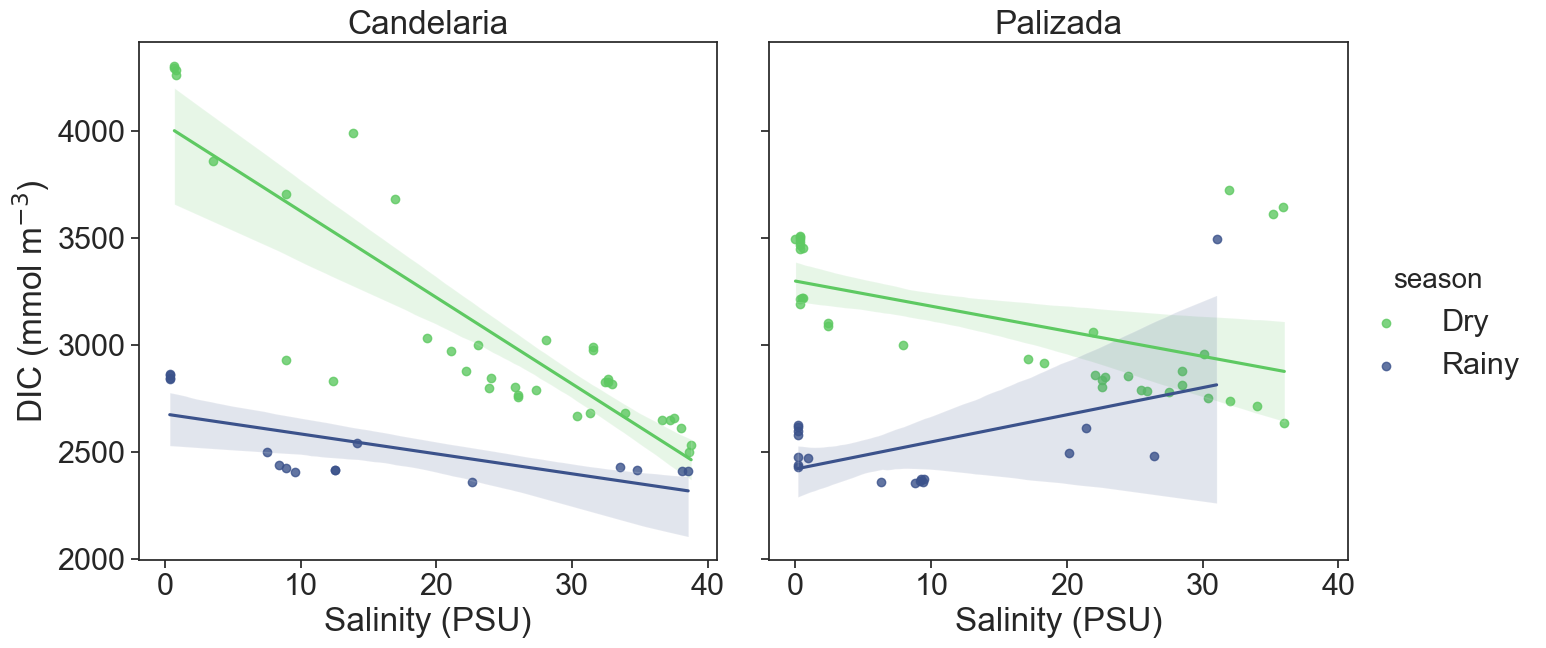

In [15]:
ax = sns.lmplot(x="sal_psu", y="ta_micromol_kg",
                hue="season",col="estuary",
                data=data_frame, 
                height=7, aspect=1)

ax.set(xlabel='Salinity (PSU)', ylabel='DIC (mmol m$^{-3}$)')

ax.set_titles(col_template="{col_name}", row_template="{row_name}")

plt.setp(ax._legend.get_title(), fontsize=20)

sns.despine(top=False,right=False)

plt.show()


##Ejercicio 2. Crear otras figuras

###A. Diagrama de dispersión de concetración de clorofila vs profundidad por estuario

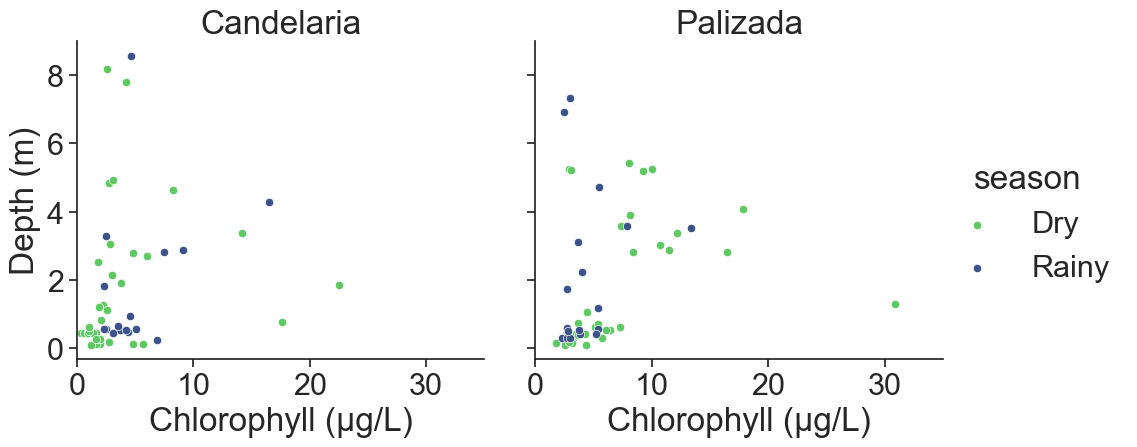

In [33]:
ax = sns.FacetGrid(
    data_frame, col="estuary", hue="season", height=5, aspect=1
)
ax.map_dataframe(sns.scatterplot, x="chlorophy_microg_l", y="depth_m")

ax.set_axis_labels("Chlorophyll (µg/L)", "Depth (m)")
ax.add_legend()
ax.set_titles(col_template="{col_name}", row_template="{row_name}")
ax.set(xlim=(0, 35))

plt.show()

###B. Pariplot para explorar relaciones entre varias variables numéricas

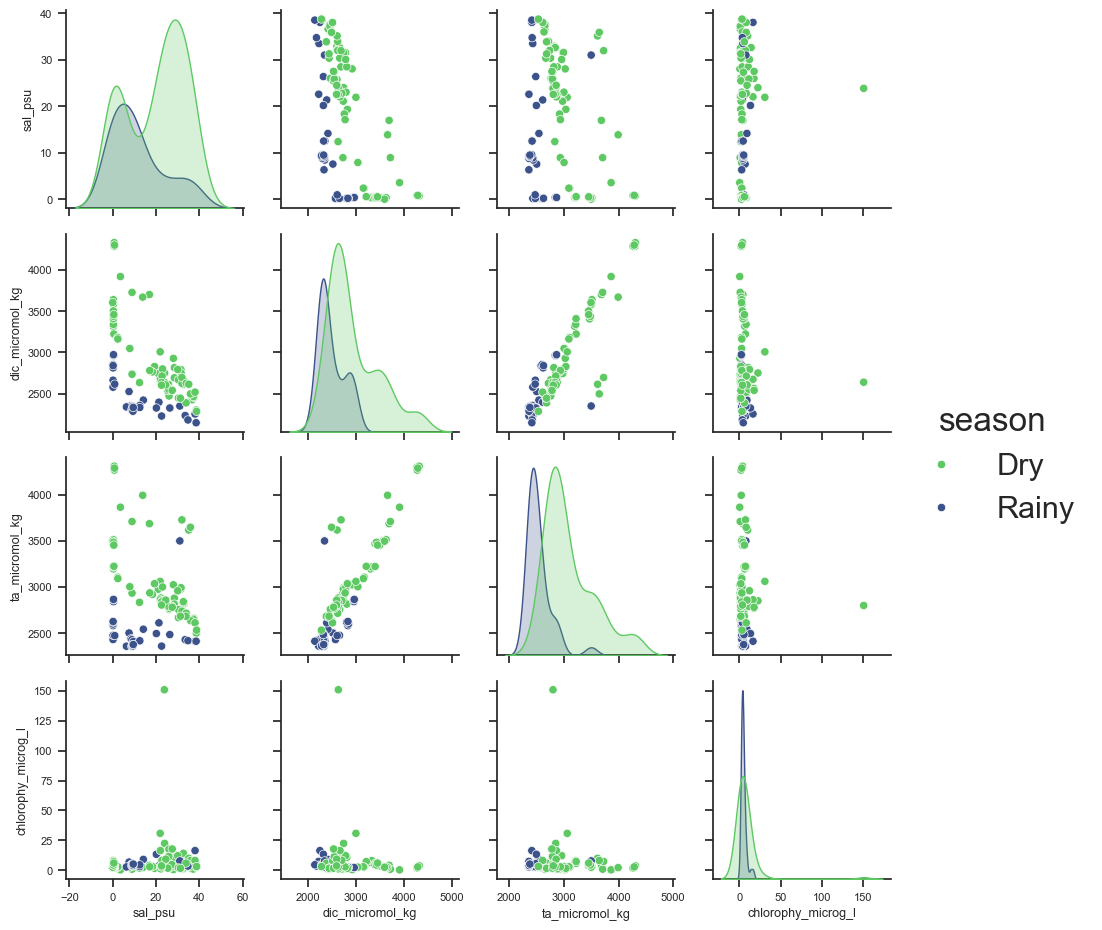

In [ ]:
g = sns.pairplot(
    data_frame[["sal_psu", "dic_micromol_kg", "ta_micromol_kg", "chlorophy_microg_l", "season"]],
    hue="season"
)

#Modificar tamaño etiquetas ejes
for ax in g.axes.flat:
    ax.tick_params(axis='y', labelsize=8)
    ax.tick_params(axis='x', labelsize=8)
    
    ax.set_ylabel(ax.get_ylabel(), fontsize=9)
    ax.set_xlabel(ax.get_xlabel(), fontsize=9)

plt.show()